## IMAGE BINARIZATION FOR HANDWRITING OCR

v4 - EDA - Ross Kimberlin - 6/2/2022

#### (TRYING scikit-image APPROACH FROM https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/)

In [63]:
import cv2
import glob
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
from PIL import Image
from skimage import data
from skimage.color import rgb2gray
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, \
    classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

%matplotlib inline

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### H-DIBCO DATA SET

#### TRYING imageio -

SEE https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/

In [2]:
read_dir_DIBCO = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [3]:
DIBCO_test_img_10 = imi.imread(read_dir_DIBCO + '10.bmp')

In [37]:
read_dir_DIBCO_GT = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/'

In [38]:
DIBCO_test_GT_img_10 = imi.imread(read_dir_DIBCO_GT + '10_gt.bmp')

In [43]:
DIBCO_test_GT_img_10_GS = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp',
                                    cv2.IMREAD_GRAYSCALE)

In [44]:
DIBCO_test_GT_img_10_GS

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [45]:
DIBCO_test_GT_img_10_GS.shape

(315, 378)

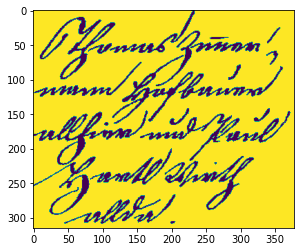

In [46]:
plt.imshow(DIBCO_test_GT_img_10_GS)

In [47]:
DIBCO_test_GT_img_10_GS.min()

0

In [48]:
DIBCO_test_GT_img_10_GS.max()

255

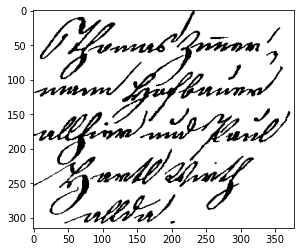

In [39]:
plt.imshow(DIBCO_test_GT_img_10)

In [40]:
DIBCO_test_GT_img_10.shape

(315, 378, 3)

In [41]:
DIBCO_test_GT_img_10

Array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(SCIKIT-LEARN ACCURACY)

In [56]:
GT_10_flat = DIBCO_test_GT_img_10_GS.flatten()

In [57]:
thresh1_flat = thresh1.flatten()

In [58]:
accuracy_score(GT_10_flat,
               thresh1_flat)

0.9441253044427648

(WHICH PIXELS ARE DISAGREED ON?)

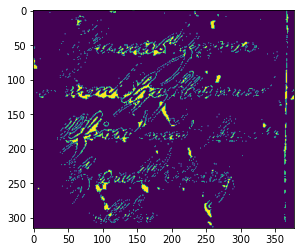

In [60]:
plt.imshow(DIBCO_test_GT_img_10_GS - thresh1)

In [119]:
DIBCO_GT = []
DIBCO_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):
    
    DIBCO_GT.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0])):
    
    DIBCO_orig.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))

In [84]:
DIBCO_GT

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [85]:
DIBCO_orig

[array([[223, 223, 223, ..., 228, 229, 230],
        [222, 222, 222, ..., 229, 230, 232],
        [223, 223, 223, ..., 229, 229, 230],
        ...,
        [211, 211, 211, ..., 222, 221, 221],
        [212, 212, 212, ..., 221, 220, 220],
        [212, 212, 212, ..., 221, 221, 221]], dtype=uint8),
 array([[183, 188, 190, ..., 190, 178, 179],
        [186, 192, 195, ..., 179, 182, 181],
        [184, 190, 192, ..., 185, 185, 181],
        ...,
        [186, 183, 181, ..., 196, 195, 192],
        [179, 176, 175, ..., 198, 196, 193],
        [175, 171, 173, ..., 204, 202, 199]], dtype=uint8),
 array([[207, 206, 206, ..., 217, 217, 216],
        [205, 206, 206, ..., 219, 219, 219],
        [205, 205, 206, ..., 218, 219, 219],
        ...,
        [208, 209, 208, ..., 214, 214, 216],
        [206, 207, 209, ..., 215, 216, 216],
        [206, 207, 209, ..., 215, 216, 216]], dtype=uint8),
 array([[218, 218, 219, ..., 230, 233, 234],
        [218, 218, 218, ..., 231, 233, 234],
        [218, 21

In [114]:
sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp']

In [118]:
sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp']

## STEP 2) TO DO - BINARIZE BLACK & WHITE

(PREFERRED OVER GRAYSCALE, BUT REQUIRES A GRAYSCALE IMAGE FIRST AS INPUT)

#### TRYING cv2.imread GRAYSCALE--

SEE Gallego, train.py, page 3

In [4]:
DTI_cv_test_10 = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp', 
                            cv2.IMREAD_GRAYSCALE)

In [5]:
DTI_cv_test_10

array([[183, 188, 190, ..., 190, 178, 179],
       [186, 192, 195, ..., 179, 182, 181],
       [184, 190, 192, ..., 185, 185, 181],
       ...,
       [186, 183, 181, ..., 196, 195, 192],
       [179, 176, 175, ..., 198, 196, 193],
       [175, 171, 173, ..., 204, 202, 199]], dtype=uint8)

In [32]:
DTI_cv_test_10.min()

39.0

In [33]:
DTI_cv_test_10.max()

252.0

In [35]:
DTI_cv_test_10.shape

(315, 378)

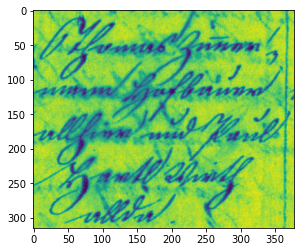

In [6]:
plt.imshow(DTI_cv_test_10)

In [7]:
DTI_cv_test_10.shape[0]

315

#### SEE Gallego, utilDataGenerator.py, page 1

In [8]:
type(DTI_cv_test_10)

numpy.ndarray

In [9]:
DTI_cv_test_10 = DTI_cv_test_10.astype('float32')

In [10]:
DTI_cv_test_10 = 255. - DTI_cv_test_10

In [11]:
DTI_cv_test_10

array([[72., 67., 65., ..., 65., 77., 76.],
       [69., 63., 60., ..., 76., 73., 74.],
       [71., 65., 63., ..., 70., 70., 74.],
       ...,
       [69., 72., 74., ..., 59., 60., 63.],
       [76., 79., 80., ..., 57., 59., 62.],
       [80., 84., 82., ..., 51., 53., 56.]], dtype=float32)

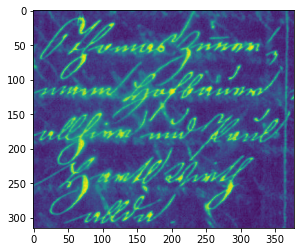

In [12]:
plt.imshow(DTI_cv_test_10)

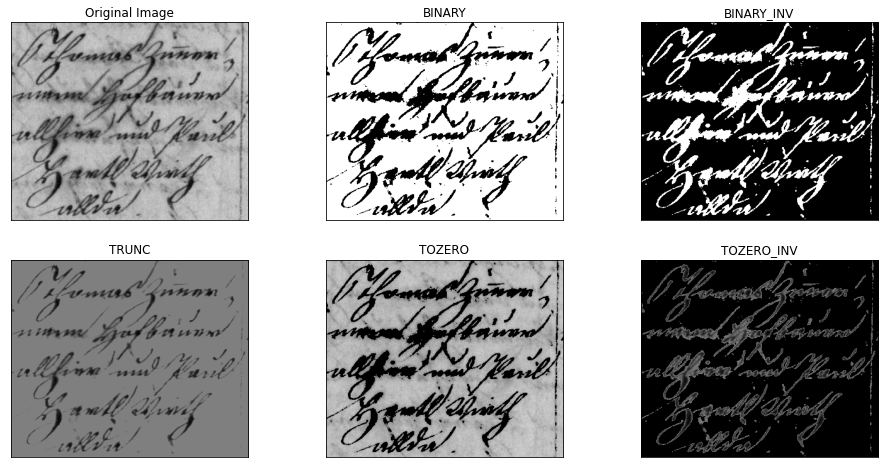

In [36]:
plt.figure(figsize = (16, 8))

ocv_img_test_1 = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp', 
                            0)

ret,thresh1 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TOZERO_INV)
                           
titles_st = ['Original Image', 'BINARY', 'BINARY_INV',
          'TRUNC', 'TOZERO', 'TOZERO_INV']

images_st = [ocv_img_test_1, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images_st[i],
                                     'gray',
                                     vmin=0,
                                     vmax=255)
    plt.title(titles_st[i])
    plt.xticks([]), plt.yticks([])
plt.show();

#### (TRY A PASS WITH TRUNCATED IMAGE IN THE FUTURE)

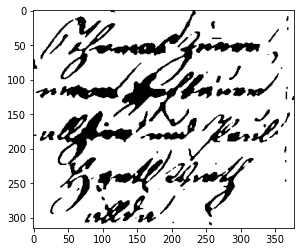

In [14]:
DTI_10_bin = plt.imshow(ndimage.median_filter(thresh1, 4),
                        'gray',
                        vmin=0,
                        vmax=255)
DTI_10_bin

In [15]:
DIBCO_df_train = pd.DataFrame()
DIBCO_df_train['Original Image', 'BINARY', 'BINARY_INV'] = [ocv_img_test_1, thresh1, thresh2]

In [16]:
DIBCO_df_train

,"(Original Image, BINARY, BINARY_INV)"
0,"[[183, 188, 190, 189, 188, 185, 184, 189, 183,..."
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [17]:
DIBCO_df_test = pd.DataFrame()
DIBCO_df_test['TRUNC', 'TOZERO', 'TOZERO_INV'] = [thresh3, thresh4, thresh5]

In [18]:
DIBCO_df_test

,"(TRUNC, TOZERO, TOZERO_INV)"
0,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,..."
1,"[[183, 188, 190, 189, 188, 185, 184, 189, 183,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(TO DO - TRY scikit-image APPROACH FROM https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/?)

## STEP 3) TO DO - TRY KERAS MACHINE-LEARNING MODEL

In [120]:
X_train, X_test, y_train, y_test = train_test_split(DIBCO_orig,
                                                    DIBCO_GT,
                                                    train_size = 0.75,
                                                    test_size = 0.25,
                                                    random_state = 321)

In [121]:
def thresh_acc(thresh):
   
    accuracies = []

    for ground_truth, original in zip(y_train, X_train):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE ACCURACY SCORES ACROSS TRAINING DATA
        accuracies.append(accuracy_score(ground_truth.flatten(),
                                         predicted.flatten()))
    
    # AVERAGE ACCURACY SCORES
    return np.mean(accuracies) 

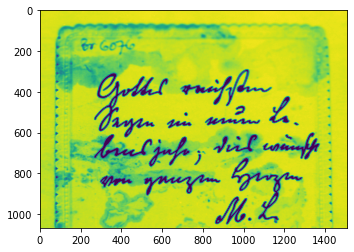

In [122]:
plt.imshow(X_train[3])

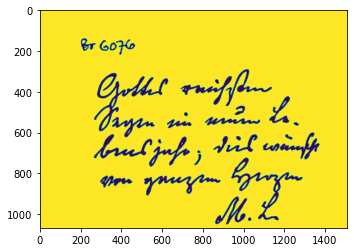

In [123]:
plt.imshow(y_train[3])

In [124]:
thresh_acc(160)

0.9455660141669453

In [126]:
accs = []

for thresh in range(0, 255):
    
    accs.append(thresh_acc(thresh))

In [130]:
np.asarray(accs).max()

0.9719764300186599

In [131]:
np.asarray(accs).argmax()

121

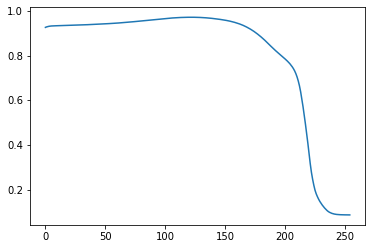

In [135]:
plt.plot(accs)

## STEP 4) PREDICTIONS AND ACCURACY METRICS

In [30]:
y_pred = np.argmax(ker_test.predict(X_test),
                   axis = 1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [31]:
print(classification_report(y_test, 
                            y_pred))

NameError: name 'y_pred' is not defined

## THEN STEP 5) FINISH TWEAKING PRE-PROCESSING & RE-ITERATE

#### (e.g. USE GAUSSIAN BLUR?  WHICH DE-NOISING, AND AFTER vs BEFORE, IMAGE SEGMENTATION, etc.)